# Day-19 Volcanic eruptions clustering

The 'eruptions.csv' file contains multipe rows of volcanic activity information. The first column is the duration of the eruption, and the second is time between two eruptions. Clustering should be applied on the entire dataset. 

### Perform the following operations:
1. Read the dataset in python using pandas. Plot a scatter of the two columns. 
2. Run the Kmeans algorithm on this dataset(using random). Choose the appropriate number of clusters for this data. What information can you gain from this clustering?
3. Plot the output of Kmeans, colored according to clusters and obtained centroids. 
5. For each cluster plot the line from the centroid to the farthest point in the cluster. 
6. Find out all the points in the cluster which have a distance greater than the mean of the cluster. Plot a graph showing them in different color. 
6. What is average distance of each cluster? (From the centroid to all points in the cluster)
7. For the following points, find out which cluster they fall in?  
dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5  
wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100  
Plot these points in separate markers & color along with the clusters

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [18]:
df = pd.read_csv('datasets/eruptions.csv')
df.head()

,dur_eruptions,wait_time_btn_eruptions
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


### 1. Read the dataset in python using pandas. Plot a scatter of the two columns.

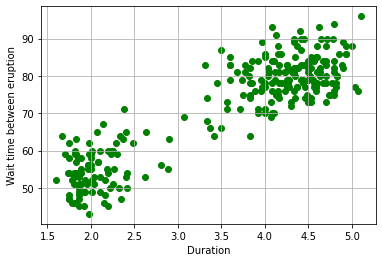

In [19]:
dur=df['dur_eruptions']
wt=df['wait_time_btn_eruptions']
plt.scatter(dur,wt,color='g')
plt.xlabel("Duration")
plt.ylabel("Wait time between eruption")
plt.grid()

### 2.Run the Kmeans algorithm on this dataset. Choose the appropriate number of clusters for this data. What information can you gain from this clustering?

In [20]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')

y_Kmeans = kmeans.fit_predict(df) 

c = kmeans.cluster_centers_
print(c)


[[ 2.09433    54.75      ]
 [ 4.29793023 80.28488372]]


### 3.Plot the output of Kmeans, colored according to clusters and obtained centroids.

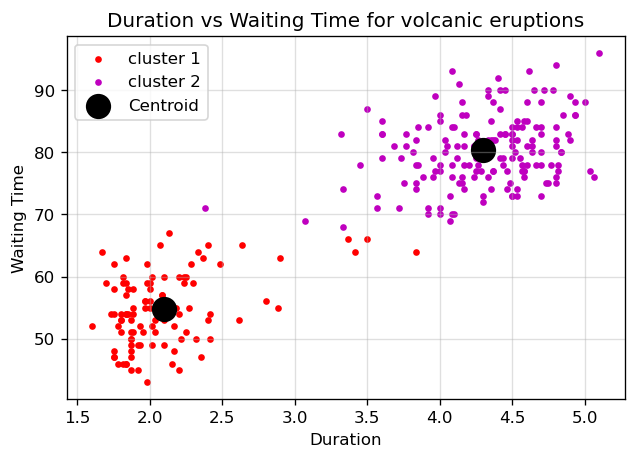

In [21]:
import numpy as np
c1_centroid=c[0]
c2_centroid=c[1]

cluster1_points=df[y_Kmeans==0]
cluster2_points=df[y_Kmeans==1]


c1_dist=cluster1_points.apply(lambda x:np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1)
c2_dist=cluster2_points.apply(lambda x:np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1)
clus1_dur = df['dur_eruptions'][y_Kmeans==0]
clus1_wait= df['wait_time_btn_eruptions'][y_Kmeans==0]

clus2_dur = df['dur_eruptions'][y_Kmeans==1]
clus2_wait= df['wait_time_btn_eruptions'][y_Kmeans==1]


plt.figure(dpi =120)
plt.scatter(clus1_dur,clus1_wait ,c='r',marker = '.',label = 'cluster 1')
plt.scatter(clus2_dur,clus2_wait ,c='m',marker = '.',label = 'cluster 2')
plt.scatter(c[:,0], c[:,1], c = 'black', s =200,label = 'Centroid')



plt.xlabel('Duration')
plt.ylabel('Waiting Time')
plt.title('Duration vs Waiting Time for volcanic eruptions')
plt.legend()
plt.grid(alpha =0.4)



### 4.For each cluster plot the line from the centroid to the farthest point in the cluster.

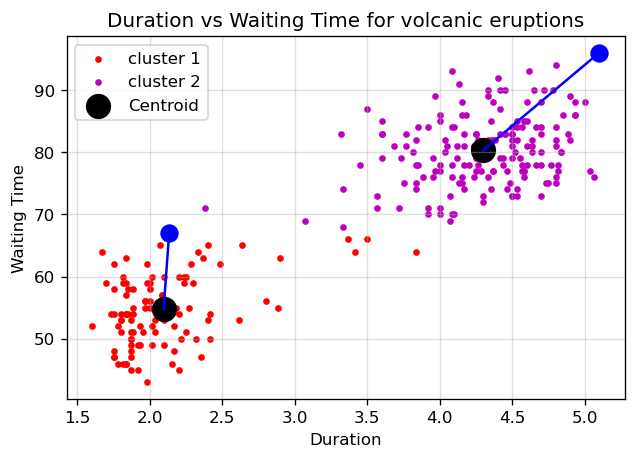

In [95]:
import numpy as np
c1_centroid=c[0]
c2_centroid=c[1]

cluster1_points=df[y_Kmeans==0]
cluster2_points=df[y_Kmeans==1]
#print(cluster1_points)

c1_dist=cluster1_points.apply(lambda x:np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1)
c2_dist=cluster2_points.apply(lambda x:np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1)

dis=list()
dis=c1_dist.tolist()+c2_dist.tolist()


#print(type(c1_dist))
#print(cluster1_points)

max_dist=df.loc[c1_dist.idxmax()]
max_dist1=df.loc[c2_dist.idxmax()]

x=[c[1][0],max_dist1[0]]
y=[c[1][1],max_dist1[1]]


x1=[c[0][0],max_dist[0]]
y1=[c[0][1],max_dist[1]]


#print(x,y)
plt.figure(dpi =120)
plt.scatter(clus1_dur,clus1_wait ,c='r',marker = '.',label = 'cluster 1')
plt.scatter(clus2_dur,clus2_wait ,c='m',marker = '.',label = 'cluster 2')
plt.scatter(c[:,0], c[:,1], c = 'black', s =200,label = 'Centroid')
plt.scatter(max_dist[0],max_dist[1],color='b',s=100)
plt.scatter(max_dist1[0],max_dist1[1],color='b',s=100)
plt.plot(x,y,color='b')
plt.plot(x1,y1,color='b')

plt.xlabel('Duration')
plt.ylabel('Waiting Time')
plt.title('Duration vs Waiting Time for volcanic eruptions')
plt.legend()
plt.grid(alpha =0.4)




 ### 5.out all the points in the cluster which have a distance greater than the mean of the cluster. Plot a graph showing them in different color.

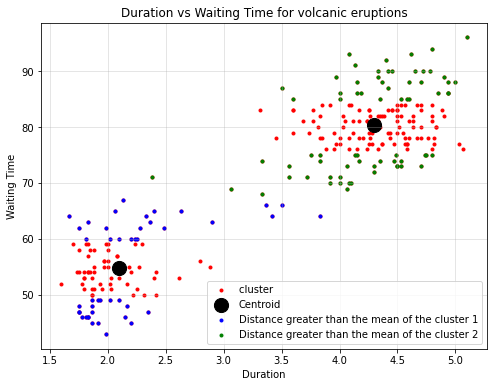

In [109]:
temp=df
temp2=df

temp['distance']=c1_dist
c1=df[temp['distance']>c1_dist.mean()]
#print(c1)
temp2=temp
temp2['distance']=c2_dist
c2=df[temp2['distance']>c2_dist.mean()]
#print(c2)

plt.figure(figsize=(8,6))
plt.scatter(clus1_dur,clus1_wait ,c='r',marker = '.',label = 'cluster ')
plt.scatter(clus2_dur,clus2_wait ,c='r',marker = '.')
plt.scatter(c[:,0], c[:,1], c = 'black', s =200,label = 'Centroid')

plt.scatter(c1['dur_eruptions'],c1['wait_time_btn_eruptions'] ,c='b',marker = '.',label = 'Distance greater than the mean of the cluster 1')
plt.scatter(c2['dur_eruptions'],c2['wait_time_btn_eruptions'] ,c='G',marker = '.',label = 'Distance greater than the mean of the cluster 2')


plt.xlabel('Duration')
plt.ylabel('Waiting Time')
plt.title('Duration vs Waiting Time for volcanic eruptions')
plt.legend(loc=4)
plt.grid(alpha =0.4)



### 6 What is average distance of each cluster? (From the centroid to all points in the cluster)

In [24]:
print("Average distance of cluster 1: ",c1_dist.mean())
print("Average distance of cluster 2: ",c2_dist.mean())

Average distance of cluster 1:  4.899078763179232
Average distance of cluster 2:  4.556493732778597


### 7. For the following points, find out which cluster they fall in?
- dur_eruptions = 2.5, 3.0, 3.2, 4.5, 5.0, 1.5
- wait_time_btn_eruptions = 70, 55, 70, 80, 70, 100
- Plot these points in separate markers & color along with the clusters

     0   1     dist1      dist2
1  3.0  55  0.939541  25.318175
     0   1      dist1      dist2
0  2.5  70  15.255395  10.440852
2  3.2  70  15.290030  10.343321
3  4.5  80  25.364340   0.349272
4  5.0  70  15.524349  10.308818


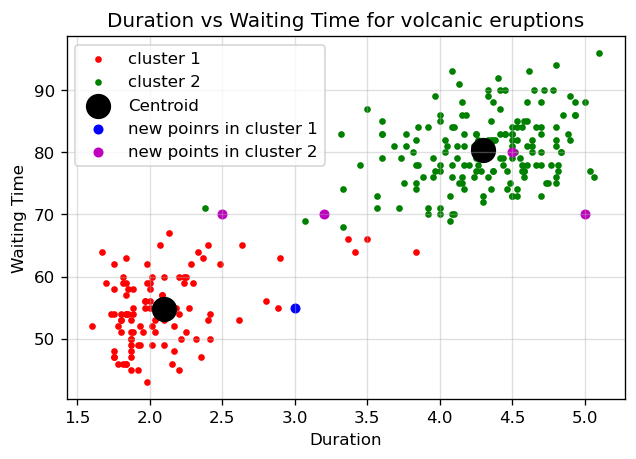

In [110]:
dur_eruptions = [2.5, 3.0, 3.2, 4.5, 5.0, 1.5]
wait_time_btn_eruptions = [70, 55, 70, 80, 70, 100]

df2=pd.DataFrame([[2.5,70], [3.0,55], [3.2,70], [4.5,80], [5.0,70],[1.5,100]])

dis_c1=df2.apply(lambda x:np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2),axis=1)
dis_c2=df2.apply(lambda x:np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2),axis=1)

df2['dist1']=dis_c1
df2['dist2']=dis_c2
#print(df2)


cluster1=df2[df2['dist1']<c1_dist.max()]
cluster2=df2[df2['dist2']<c2_dist.max()]
 
print(cluster1)
print(cluster2)
    
plt.figure(dpi =120)
plt.scatter(clus1_dur,clus1_wait ,c='r',marker = '.',label = 'cluster 1')
plt.scatter(clus2_dur,clus2_wait ,c='g',marker = '.',label = 'cluster 2')
plt.scatter(c[:,0], c[:,1], c = 'black', s =200,label = 'Centroid')


plt.scatter(cluster1[0],cluster1[1] ,c='b',marker = '.',s=100,label = 'new poinrs in cluster 1')
plt.scatter(cluster2[0],cluster2[1] ,c='m',marker = '.',s=100,label = 'new points in cluster 2')



plt.xlabel('Duration')
plt.ylabel('Waiting Time')
plt.title('Duration vs Waiting Time for volcanic eruptions')
plt.legend()
plt.grid(alpha =0.4)

